# Random Sampling Imputation (Numerical Data)

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [3]:
df.sample(10)

,Survived,Age,Fare
458,1,50.0,10.5000
345,1,24.0,13.0000
714,0,52.0,13.0000
52,1,49.0,76.7292
147,0,9.0,34.3750
382,0,32.0,7.9250
639,0,NaN,16.1000
673,1,31.0,13.0000
58,1,5.0,27.7500
279,1,35.0,20.2500


### Checking Null values

In [4]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

### Creating X & Y

In [5]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

### Applying Train Test Split

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

### New column create in both Train & Test 

In [7]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [8]:
x_train.sample(5)

,Age,Fare,Age_imputed
753,23.0,7.8958,23.0
338,45.0,8.0500,45.0
611,NaN,7.0500,NaN
381,1.0,15.7417,1.0
362,45.0,14.4542,45.0


In [32]:
x_train.loc[x_train['Age_imputed'].isnull(), 'Age_imputed'] = x_train['Age'].dropna().sample(x_train['Age_imputed'].isnull().sum(), random_state= 42).values
x_test.loc[x_test['Age_imputed'].isnull(), 'Age_imputed'] = x_train['Age'].dropna().sample(x_test['Age_imputed'].isnull().sum(), random_state= 42).values

### Review Sample Random Generate Value

In [33]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values.astype(int)

array([20, 24, 17, 17, 21, 17, 24, 26,  7, 20, 29, 60, 23, 61, 22, 35, 44,
       44, 62,  2, 30, 47, 23,  9, 45, 40,  3, 16, 62, 45, 27, 33, 19, 32,
       17, 50, 23, 21, 29, 18,  0, 25, 30, 37, 25, 23, 31, 47, 41, 22, 22,
       38, 23, 34, 23,  8, 11, 51, 28, 58, 47, 70, 26, 19, 25, 40, 31, 42,
        2, 52,  8, 36, 43, 14, 30, 35, 18, 26, 42, 65, 29, 50, 28, 56, 16,
       36, 32, 33, 18, 24, 48, 39, 19, 65, 58, 28, 49, 32, 48, 31, 63, 45,
       44,  6, 25, 31, 34, 31,  4, 22, 24, 28, 42, 38, 38, 33, 24, 17, 43,
       33, 21, 11, 19, 46,  3, 21, 32, 32, 46, 33, 43, 58, 56, 27, 28, 27,
       32, 31, 47,  2, 38, 25, 26, 36, 50, 29, 22, 56])

In [34]:
x_train['Age_imputed'] = x_train['Age_imputed'].astype(int)

In [35]:
x_train, x_test

(      Age      Fare  Age_imputed
 30   40.0   27.7208           40
 10    4.0   16.7000            4
 873  47.0    9.0000           47
 182   9.0   31.3875            9
 876  20.0    9.8458           20
 ..    ...       ...          ...
 534  30.0    8.6625           30
 584   NaN    8.7125           18
 493  71.0   49.5042           71
 527   NaN  221.7792           21
 168   NaN   25.9250           10
 
 [712 rows x 3 columns],
       Age     Fare  Age_imputed
 707  42.0  26.2875         42.0
 37   21.0   8.0500         21.0
 615  24.0  65.0000         24.0
 169  28.0  56.4958         28.0
 68   17.0   7.9250         17.0
 ..    ...      ...          ...
 89   24.0   8.0500         24.0
 80   22.0   9.0000         22.0
 846   NaN  69.5500         25.0
 870  26.0   7.8958         26.0
 251  29.0  10.4625         29.0
 
 [179 rows x 3 columns])

### Compare Original Age and Imputed Age

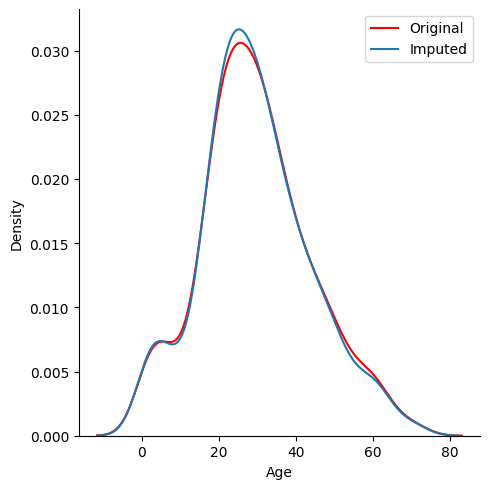

In [51]:
sns.displot(x_train['Age'], label = 'Original', kind = 'kde', legend = True, color = 'red')
sns.kdeplot(x_train['Age_imputed'], label = 'Imputed', legend = True)
plt.legend()
plt.show()

### Compare Variable Variance

In [56]:
print(f'''Original Variable Variance: {x_train['Age'].var().round(3)}
Variance after Random Imputation: {x_train['Age_imputed'].var().round(3)}''')

Original Variable Variance: 204.35
Variance after Random Imputation: 200.329
